In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")
plt.style.use('fivethirtyeight')
data = pd.read_csv(r"clean-boatos.org-2022-12-19.csv", encoding="utf-8")
data['Length'] = data['title'].apply(len)
data.groupby('Length').describe().head(20)

Unnamed: 0                                                             \
            count         mean         std     min      25%     50%      75%   
Length                                                                         
35            2.0   729.500000    0.707107   729.0   729.25   729.5   729.75   
38            2.0   389.500000    0.707107   389.0   389.25   389.5   389.75   
41            2.0   569.500000    0.707107   569.0   569.25   569.5   569.75   
42            1.0   140.000000         NaN   140.0   140.00   140.0   140.00   
46            1.0  1186.000000         NaN  1186.0  1186.00  1186.0  1186.00   
47            8.0   876.875000  424.771682   117.0   545.00  1163.0  1168.25   
48            5.0   746.200000  409.796535   404.0   405.00   540.0  1190.00   
49            1.0   585.000000         NaN   585.0   585.00   585.0   585.00   
50            5.0   611.600000  370.955253   302.0   303.00   509.0   761.00   
51            6.0   463.666667  261.417418   269.0   270.25   326.0   667.50   
52            6.0   649.000000  462.157116   179.0   245.75   580.0  1065.75   
53            6.0   259.500000  123.221346   188.0   189.25   190.5   278.00   
54            4.0   807.250000  290.426554   408.0   684.00   899.0  1022.25   
55            7.0   491.857143  438.449324    28.0   121.00   541.0   724.00   
56            9.0   410.888889  272.769795   130.0   185.00   350.0   436.00   
57            6.0   573.500000  517.027949   133.0   136.50   397.5  1054.50   
58           18.0   758.111111  268.433777   254.0   544.25   835.0   886.25   
59           14.0   656.214286  192.131437   357.0   531.00   688.0   827.75   
60           22.0   667.090909  438.686775    26.0   161.25   846.5  1024.25   
61           14.0   822.714286  238.998368   334.0   691.25   781.5   994.75   

               Unnamed: 6                                     
           max      count mean  std  min  25%  50%  75%  max  
Length                                                        
35       730.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
38       390.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
41       570.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
42       140.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
46      1186.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
47      1189.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
48      1192.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
49       585.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50      1183.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
51       828.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
52      1193.0        2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
53       492.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
54      1023.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
55      1184.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
56       879.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
57      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
58      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
59       893.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
60      1185.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
61      1187.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [2]:
data.head()

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
0,0,https://www.boatos.org/saude/morte-subita-died...,2022-11-30 13:18:17,"""Morte Súbita (died suddenly) O Fim da Farsa"" ...",“MORTE SÚBITA (DIED SUDDENLY) COMPARTILHE ESSE...,1,NaN,77
1,2,https://www.boatos.org/saude/mascaras-contamin...,2022-11-19 12:34:22,Máscaras contaminadas estão chegando da China ...,MÁSCARAS CONTAMINADAS DA CHINA CHEGANDO PRA ...,1,NaN,80
2,3,https://www.boatos.org/saude/teste-covid-19-ja...,2022-11-16 19:01:17,Teste de Covid-19 já vem infectado com vírus n...,Transcrição: Uma coisa no teste de covid. É um...,1,NaN,71
3,4,https://www.boatos.org/saude/criador-vacina-pf...,2022-11-16 15:55:15,"Criador da vacina da Pfizer, Robert Malone rev...",O pronunciamento que o mundo não esperava: Cri...,1,NaN,114
4,5,https://www.boatos.org/saude/nova-onda-da-covi...,2022-11-12 11:55:02,Nova onda da Covid-19 com subvariantes da Ômic...,"Olá, sou médico sanitarista e a minha especial...",1,NaN,73


In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
filtered_jul_dez_2022 = data.loc[(data['date'] >= '2022-07-01') & (data['date'] <= '2023-01-01')]
filtered_jul_dez_2022

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
0,0,https://www.boatos.org/saude/morte-subita-died...,2022-11-30 13:18:17,"""Morte Súbita (died suddenly) O Fim da Farsa"" ...",“MORTE SÚBITA (DIED SUDDENLY) COMPARTILHE ESSE...,1,NaN,77
1,2,https://www.boatos.org/saude/mascaras-contamin...,2022-11-19 12:34:22,Máscaras contaminadas estão chegando da China ...,MÁSCARAS CONTAMINADAS DA CHINA CHEGANDO PRA ...,1,NaN,80
2,3,https://www.boatos.org/saude/teste-covid-19-ja...,2022-11-16 19:01:17,Teste de Covid-19 já vem infectado com vírus n...,Transcrição: Uma coisa no teste de covid. É um...,1,NaN,71
3,4,https://www.boatos.org/saude/criador-vacina-pf...,2022-11-16 15:55:15,"Criador da vacina da Pfizer, Robert Malone rev...",O pronunciamento que o mundo não esperava: Cri...,1,NaN,114
4,5,https://www.boatos.org/saude/nova-onda-da-covi...,2022-11-12 11:55:02,Nova onda da Covid-19 com subvariantes da Ômic...,"Olá, sou médico sanitarista e a minha especial...",1,NaN,73
5,6,https://www.boatos.org/saude/grupo-unimed-aler...,2022-11-09 22:07:36,Grupo Unimed alerta que variante Delta da Covi...,Se cuidem! *GRUPO UNIMED ALERTA* Covid Variant...,1,NaN,104
6,7,https://www.boatos.org/saude/medico-pedro-erne...,2022-11-09 21:03:41,Médico do Pedro Ernesto alerta que Ômicron XXB...,*Notícias importantes enviadas por médico do P...,1,NaN,85
7,8,https://www.boatos.org/saude/variante-omicron-...,2022-11-07 23:17:41,Variante Ômicron XBB da Covid-19 não é detecta...,Notícias de Singapura! Todos são aconselhados ...,1,NaN,75
8,9,https://www.boatos.org/saude/ufrj-mente-covid-...,2022-11-07 14:48:57,"UFRJ mente que ""covid voltou"" apenas para desm...",“A UFRJ ESTÁ DIZENDO QUE A COVID VOLTOU PARA A...,1,NaN,83
9,10,https://www.boatos.org/saude/ufrj-mente-covid-...,2022-11-07 14:48:57,"UFRJ mente que ""covid voltou"" apenas para desm...","“Gente, hoje é dia 6 de novembro de 2022, do...",1,NaN,83


In [6]:
import re
import nltk
nltk.download('punkt')
from nltk import tokenize 
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language="portuguese")

filtered_jul_dez_2022['title'] = filtered_jul_dez_2022['title'].apply(word_tokenize)
filtered_jul_dez_2022['title'] = filtered_jul_dez_2022['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))
print(filtered_jul_dez_2022['title'])


0     `` mort súbit ( died suddenly ) o fim da fars ...
1     másc contamin estã cheg da chin par contamin p...
2     test de covid-19 já vem infect com vírus no co...
3     criador da vacin da pfiz , robert malon revel ...
4     nov onda da covid-19 com subv da ômicron bq.1 ...
5     grup unimed alert que variant delt da covid-19...
6     médic do pedr ernest alert que ômicron xxb é m...
7     variant ômicron xbb da covid-19 nã é detect em...
8     ufrj ment que `` covid volt `` apen par desmob...
9     ufrj ment que `` covid volt `` apen par desmob...
10    uso de másc e comprov de vacin sã obrigatór pa...
11    oms escolh brasil , japã e holand com melhor p...
12    dinamarc proib vacin contr covid-19 par popul ...
13    supr cort dos eua decid que vacin contr covid-...
14    débor birx e anthony fauc admit que invent men...
15    exposiçã no microscóp mostr que vacin contr co...
16    exposiçã no microscóp mostr que vacin contr co...
17    nov golp do pix usa ligaçã do 95004-1117 s

[nltk_data] Downloading package punkt to /home/daniela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_31316/3500082293.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jul_dez_2022['title'] = filtered_jul_dez_2022['title'].apply(word_tokenize)
/tmp/ipykernel_31316/3500082293.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jul_dez_2022['title'] = filtered_jul_dez_2022['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))


In [7]:
import texthero as hero # text hero  
filtered_jul_dez_2022["PCA"] = (
            filtered_jul_dez_2022['title']
            .pipe(hero.clean)
            .pipe(hero.tfidf) # term frequency and inverse document frequency 
            .pipe(hero.pca)
)

/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbols)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:661: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, "")
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:173: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(rf"([{string.punctuation}])+", symbol)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:693: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, r"\2 \3 \4 \5").str.split()
/home/daniela/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Fun

In [8]:
filtered_jul_dez_2022

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length,PCA
0,0,https://www.boatos.org/saude/morte-subita-died...,2022-11-30 13:18:17,`` mort súbit ( died suddenly ) o fim da fars ...,“MORTE SÚBITA (DIED SUDDENLY) COMPARTILHE ESSE...,1,NaN,77,"[-0.40819383823735295, -0.3873510745332786]"
1,2,https://www.boatos.org/saude/mascaras-contamin...,2022-11-19 12:34:22,másc contamin estã cheg da chin par contamin p...,MÁSCARAS CONTAMINADAS DA CHINA CHEGANDO PRA ...,1,NaN,80,"[-2.0342541618205034, 3.621331492995049]"
2,3,https://www.boatos.org/saude/teste-covid-19-ja...,2022-11-16 19:01:17,test de covid-19 já vem infect com vírus no co...,Transcrição: Uma coisa no teste de covid. É um...,1,NaN,71,"[-0.9506364951935697, 0.0576070078271689]"
3,4,https://www.boatos.org/saude/criador-vacina-pf...,2022-11-16 15:55:15,"criador da vacin da pfiz , robert malon revel ...",O pronunciamento que o mundo não esperava: Cri...,1,NaN,114,"[3.1665092002450357, -0.911079503276971]"
4,5,https://www.boatos.org/saude/nova-onda-da-covi...,2022-11-12 11:55:02,nov onda da covid-19 com subv da ômicron bq.1 ...,"Olá, sou médico sanitarista e a minha especial...",1,NaN,73,"[2.4571785170739973, 1.6833878153636264]"
5,6,https://www.boatos.org/saude/grupo-unimed-aler...,2022-11-09 22:07:36,grup unimed alert que variant delt da covid-19...,Se cuidem! *GRUPO UNIMED ALERTA* Covid Variant...,1,NaN,104,"[7.757069583874926, 1.4657716310317876]"
6,7,https://www.boatos.org/saude/medico-pedro-erne...,2022-11-09 21:03:41,médic do pedr ernest alert que ômicron xxb é m...,*Notícias importantes enviadas por médico do P...,1,NaN,85,"[5.432053627331942, 1.720366305013059]"
7,8,https://www.boatos.org/saude/variante-omicron-...,2022-11-07 23:17:41,variant ômicron xbb da covid-19 nã é detect em...,Notícias de Singapura! Todos são aconselhados ...,1,NaN,75,"[6.082161420299901, 1.500907918454989]"
8,9,https://www.boatos.org/saude/ufrj-mente-covid-...,2022-11-07 14:48:57,ufrj ment que `` covid volt `` apen par desmob...,“A UFRJ ESTÁ DIZENDO QUE A COVID VOLTOU PARA A...,1,NaN,83,"[-3.944721495429354, 5.1871014217828515]"
9,10,https://www.boatos.org/saude/ufrj-mente-covid-...,2022-11-07 14:48:57,ufrj ment que `` covid volt `` apen par desmob...,"“Gente, hoje é dia 6 de novembro de 2022, do...",1,NaN,83,"[-3.944721495429353, 5.187101421782847]"


# K-Means

In [9]:
filtered_jul_dez_2022['PCA']

0      [-0.40819383823735295, -0.3873510745332786]
1         [-2.0342541618205034, 3.621331492995049]
2        [-0.9506364951935697, 0.0576070078271689]
3         [3.1665092002450357, -0.911079503276971]
4         [2.4571785170739973, 1.6833878153636264]
5          [7.757069583874926, 1.4657716310317876]
6           [5.432053627331942, 1.720366305013059]
7           [6.082161420299901, 1.500907918454989]
8         [-3.944721495429354, 5.1871014217828515]
9          [-3.944721495429353, 5.187101421782847]
10         [-3.03854047419598, 0.5733772540129611]
11     [-0.026707785434309295, 1.7886396240797529]
12      [-2.4531207020804344, 0.08037153073027742]
13      [-0.8952634964678046, -1.5959317852743065]
14       [0.33895263527349045, 1.9602511099438769]
15     [-0.17225014135681063, -4.2966778787935125]
16      [-0.17225014135681121, -4.296677878793513]
17    [-1.0272900500950395, -0.018408676801509996]
18     [-1.0881102598379875, 0.047418538734938634]
19       [-1.161515769256621, -

In [10]:
finalModel = filtered_jul_dez_2022['PCA']
finalModel = np.array((list(finalModel)))
finalModel

array([[-0.40819384, -0.38735107],
       [-2.03425416,  3.62133149],
       [-0.9506365 ,  0.05760701],
       [ 3.1665092 , -0.9110795 ],
       [ 2.45717852,  1.68338782],
       [ 7.75706958,  1.46577163],
       [ 5.43205363,  1.72036631],
       [ 6.08216142,  1.50090792],
       [-3.9447215 ,  5.18710142],
       [-3.9447215 ,  5.18710142],
       [-3.03854047,  0.57337725],
       [-0.02670779,  1.78863962],
       [-2.4531207 ,  0.08037153],
       [-0.8952635 , -1.59593179],
       [ 0.33895264,  1.96025111],
       [-0.17225014, -4.29667788],
       [-0.17225014, -4.29667788],
       [-1.02729005, -0.01840868],
       [-1.08811026,  0.04741854],
       [-1.16151577, -0.87264837],
       [-0.31805863, -0.52486011],
       [-1.19943002, -3.98999926],
       [-1.19943002, -3.98999926],
       [-1.19943002, -3.98999926]])

In [11]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(finalModel)
    kmeanModel.fit(finalModel)
  
    distortions.append(sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / finalModel.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / finalModel.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.386233256138525
2 : 2.4656274353771424
3 : 1.840300655924539
4 : 1.1820225978920467
5 : 0.9827989793605553
6 : 0.8271975657602239
7 : 0.6925186974543083
8 : 0.5552894926985078
9 : 0.4432683795759025


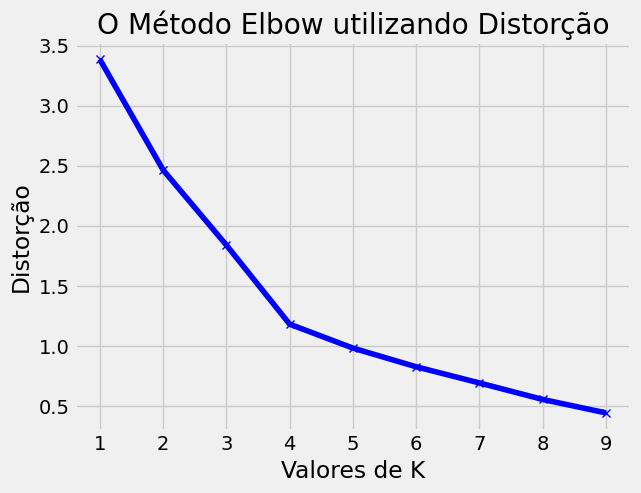

In [12]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorção')
plt.title('O Método Elbow utilizando Distorção')
plt.show()

In [13]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 377.0501166894816
2 : 212.9496881846329
3 : 108.99964824553629
4 : 50.170864620847595
5 : 31.151487380926344
6 : 21.82065639405211
7 : 15.155081797560369
8 : 11.08740119577193
9 : 7.533159777583455


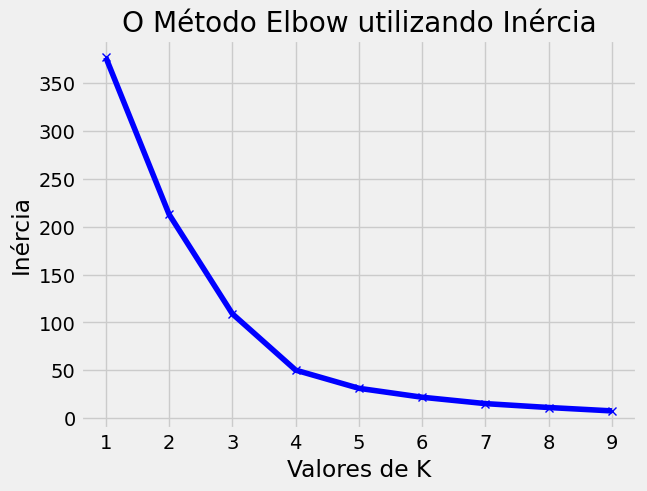

In [14]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('O Método Elbow utilizando Inércia')
plt.show()

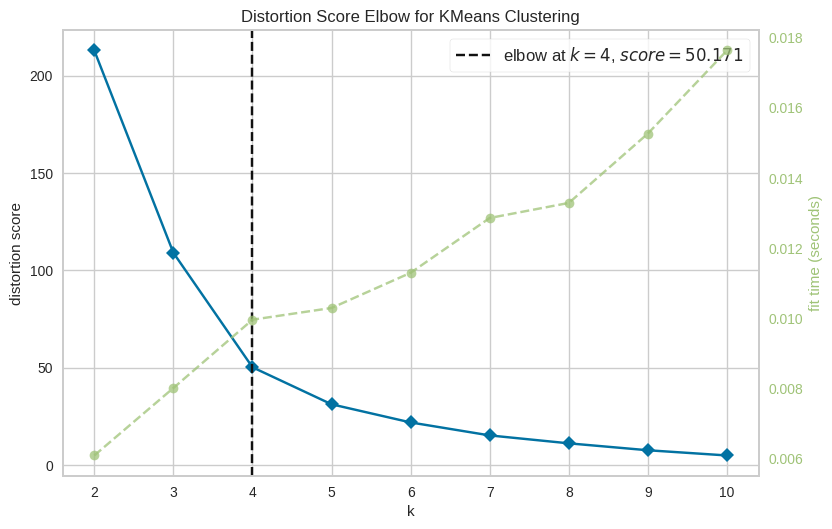

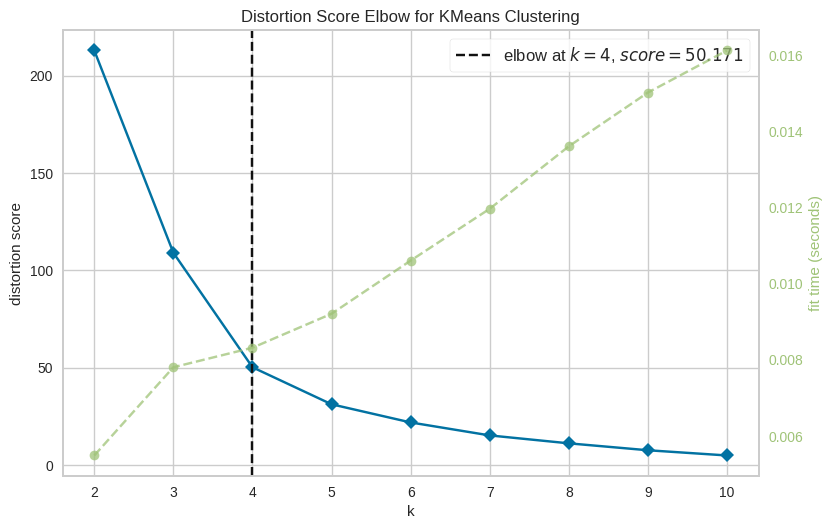

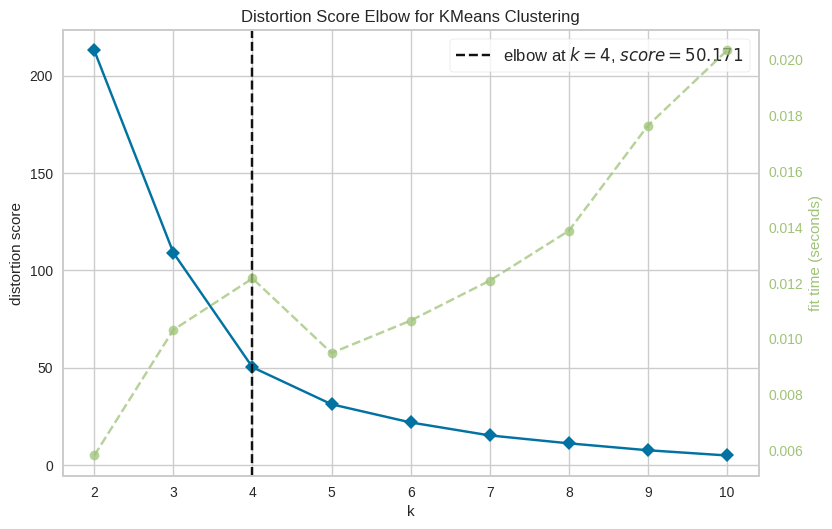

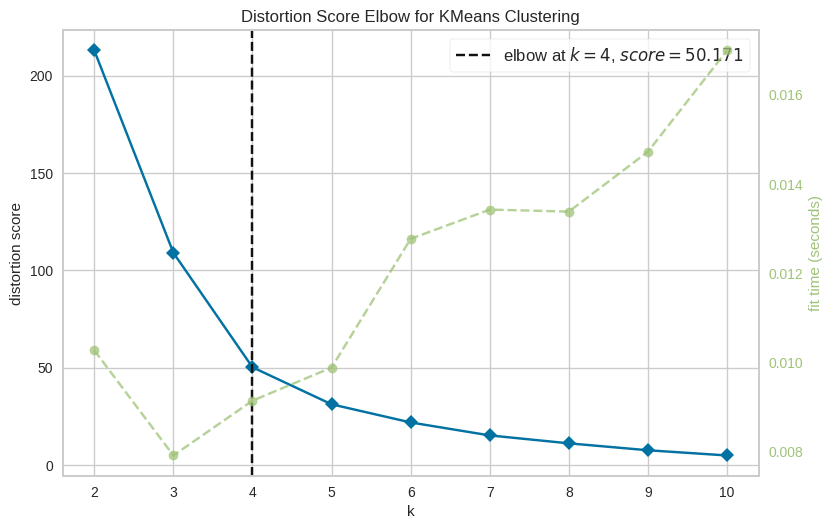

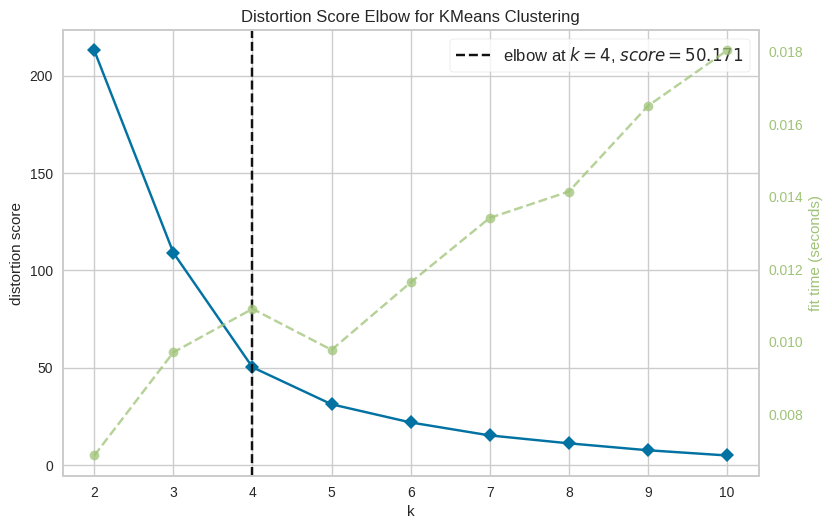

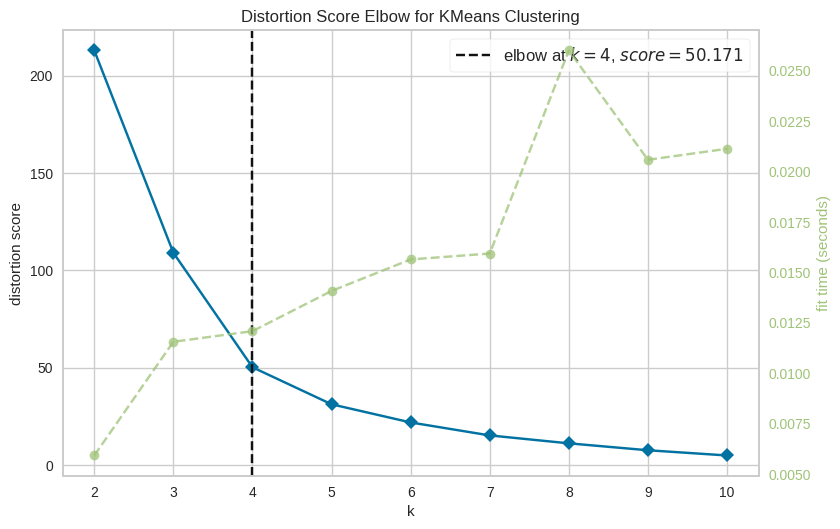

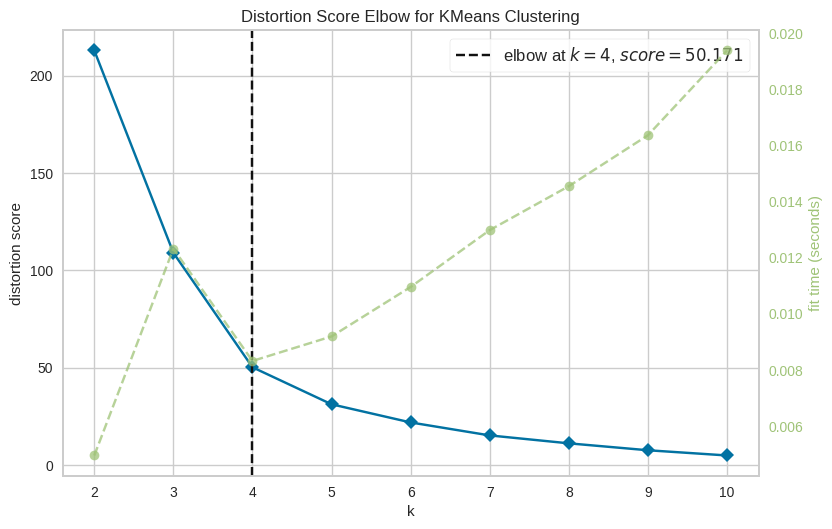

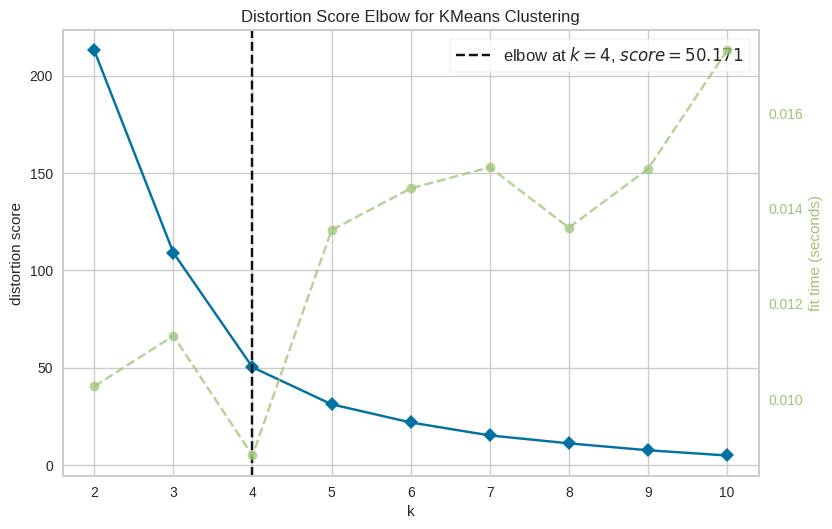

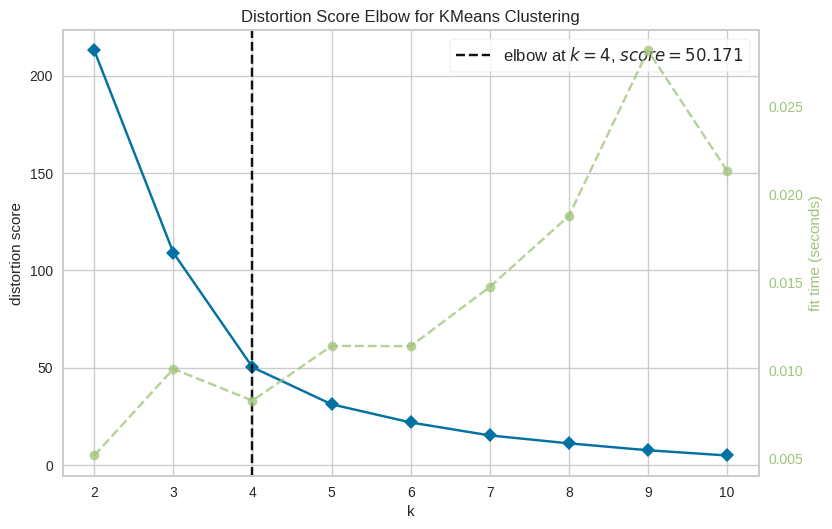

In [15]:
from yellowbrick.cluster import KElbowVisualizer

silModel = filtered_jul_dez_2022['PCA']
silModel = np.array((list(silModel)))
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(silModel)
    elb_visualizer = KElbowVisualizer(kmeanModel)
    elb_visualizer.fit(silModel)    
    elb_visualizer.show()  
    


## K = 4

[0 3 0 2 2 2 2 2 3 3 0 0 0 0 0 1 1 0 0 0 0 1 1 1]


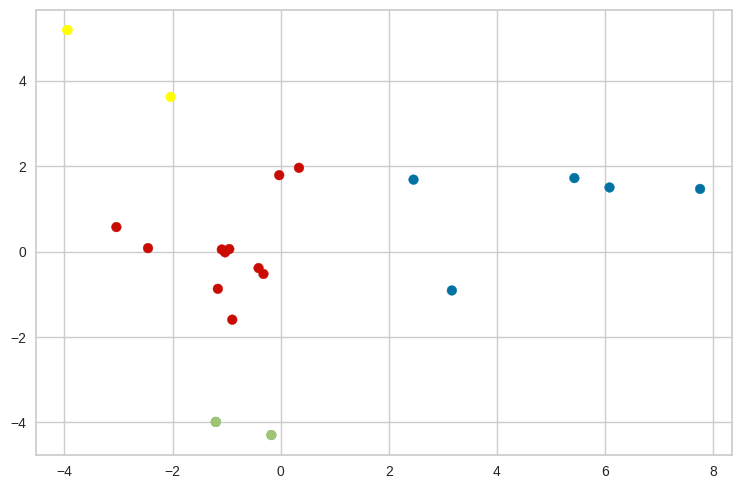

In [16]:
finalModel2 = filtered_jul_dez_2022['PCA']
finalModel2 = np.array((list(finalModel)))
finalModel2

kmeanModel2 = KMeans(n_clusters=4).fit(finalModel2)
kmeanModel2.fit(finalModel2)

print(kmeanModel2.labels_)


LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'yellow'}
label_color = [LABEL_COLOR_MAP[l] for l in kmeanModel2.labels_]
plt.scatter(finalModel2[:,0], finalModel2[:,1], c=label_color)


In [17]:
kmeanModel2.labels_

array([0, 3, 0, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int32)

In [18]:
pred_classes = kmeanModel2.predict(finalModel2)
pred_classes = list(pred_classes)

dictionaryPrime = dict(zip(filtered_jul_dez_2022["title"], pred_classes))
dictionaryPrime

{'`` mort súbit ( died suddenly ) o fim da fars `` revel a verdad sobr vacin': 0,
 'másc contamin estã cheg da chin par contamin pess no brasil': 3,
 'test de covid-19 já vem infect com vírus no cotonet , mostr víd': 0,
 'criador da vacin da pfiz , robert malon revel que as vacin contr covid-19 estav em test e nã funcion': 2,
 'nov onda da covid-19 com subv da ômicron bq.1 e bxx é uma fars': 2,
 'grup unimed alert que variant delt da covid-19 tem outr sintom , fog dos test e é mais mortal': 2,
 'médic do pedr ernest alert que ômicron xxb é mais mortal do que outr variant': 2,
 'variant ômicron xbb da covid-19 nã é detect em test e é mais mortal': 2,
 'ufrj ment que `` covid volt `` apen par desmobiliz manifest pró-bolson': 3,
 'uso de másc e comprov de vacin sã obrigatór par vot nas eleiçõ 2022': 0,
 'oms escolh brasil , japã e holand com melhor país no combat à pand da covid-19': 0,
 'dinamarc proib vacin contr covid-19 par popul com men de 50 anos': 0,
 'supr cort dos eua decid que v

## Word Cloud for first cluster n = 0

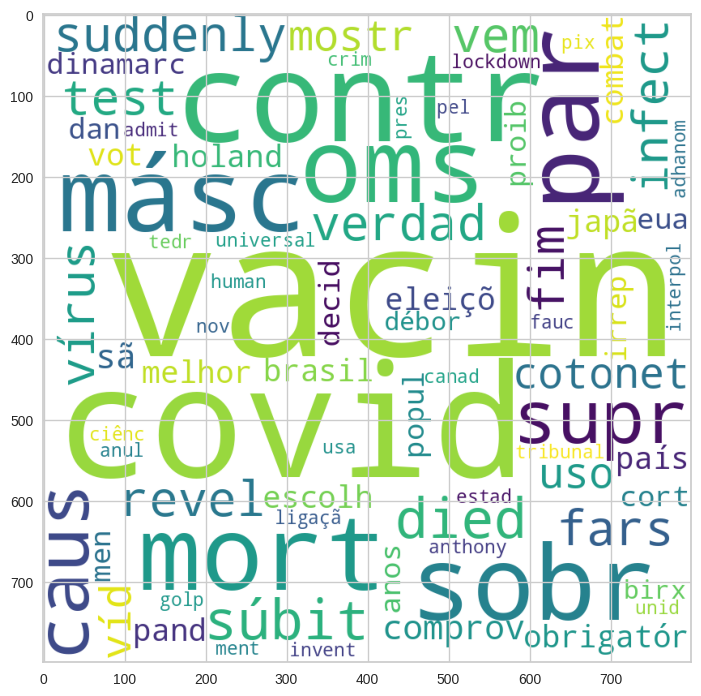

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

custom_stop_words = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

clusterOneWords = [k for k, v in dictionaryPrime.items() if v == 0]
unique_string=(" ").join(clusterOneWords)
wordCloudOne = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudOne)


## Word Cloud for second cluster n = 1

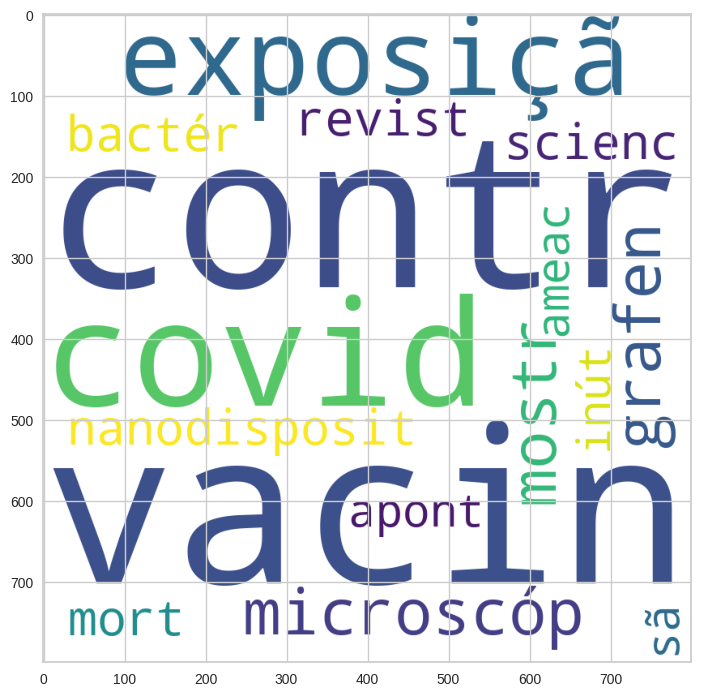

In [20]:
clusterTwoWords = [k for k, v in dictionaryPrime.items() if v == 1]

unique_string2=(" ").join(clusterTwoWords)
wordCloudTwo = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudTwo)

## Word Cloud for third cluster n = 2

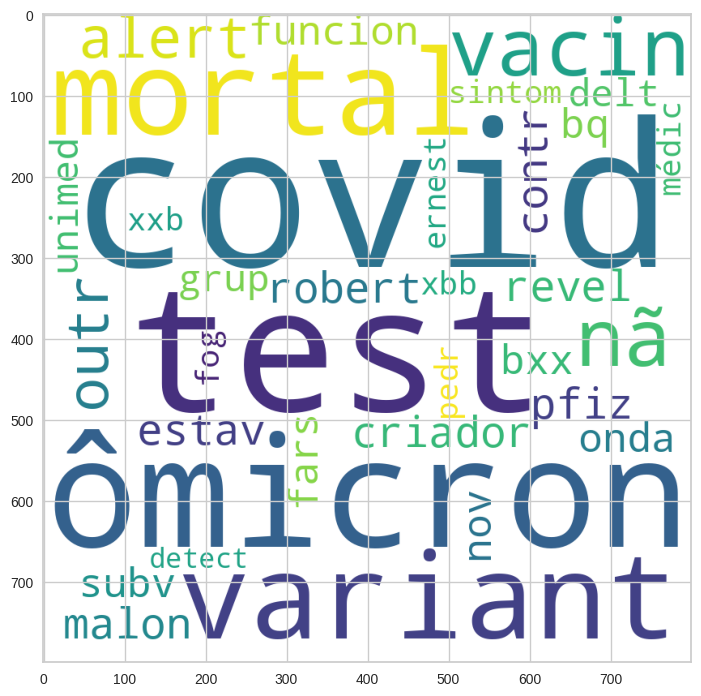

In [21]:
clusterThreeWords = [k for k, v in dictionaryPrime.items() if v == 2]

unique_string3=(" ").join(clusterThreeWords)

wordCloudThree = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string3)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudThree)

## Word Cloud for fourth cluster n = 3

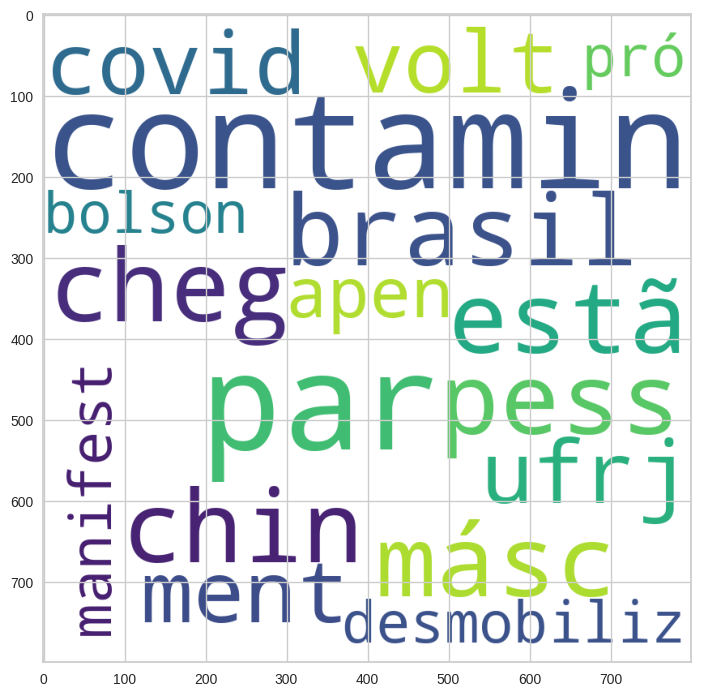

In [22]:
clusterFourWords = [k for k, v in dictionaryPrime.items() if v == 3]

unique_string4=(" ").join(clusterFourWords)

wordCloudFour = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string4)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudFour)